In [58]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# PH01-00

In [59]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)


In [60]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

In [61]:
# calculate correlation
df[np.array(df.columns)].corr()

,Unnamed: 0,flowrate,total flow,pressure,pressure voltage,flowrate sampled,pv sampled,calculated pressure,Time_diff,flowrate_manual
Unnamed: 0,1.000000,-0.021197,0.997998,-0.003079,-0.003087,-0.021159,-0.003146,-0.006232,-0.035413,-0.021183
flowrate,-0.021197,1.000000,-0.018394,0.968607,0.956084,0.988210,0.958929,0.961346,-0.003352,0.992568
total flow,0.997998,-0.018394,1.000000,-0.001313,-0.001376,-0.018369,-0.001402,-0.004242,-0.035595,-0.018346
pressure,-0.003079,0.968607,-0.001313,1.000000,0.986366,0.963250,0.988081,0.988425,-0.004794,0.967103
pressure voltage,-0.003087,0.956084,-0.001376,0.986366,1.000000,0.951606,0.981219,0.979559,-0.005294,0.954461
flowrate sampled,-0.021159,0.988210,-0.018369,0.963250,0.951606,1.000000,0.963654,0.965984,0.000114,0.989870
pv sampled,-0.003146,0.958929,-0.001402,0.988081,0.981219,0.963654,1.000000,0.998308,-0.001628,0.961695
calculated pressure,-0.006232,0.961346,-0.004242,0.988425,0.979559,0.965984,0.998308,1.000000,-0.001957,0.964155
Time_diff,-0.035413,-0.003352,-0.035595,-0.004794,-0.005294,0.000114,-0.001628,-0.001957,1.000000,-0.002961
flowrate_manual,-0.021183,0.992568,-0.018346,0.967103,0.954461,0.989870,0.961695,0.964155,-0.002961,1.000000


Score:  0.9747508931036918
Error:  0.17147275376543547


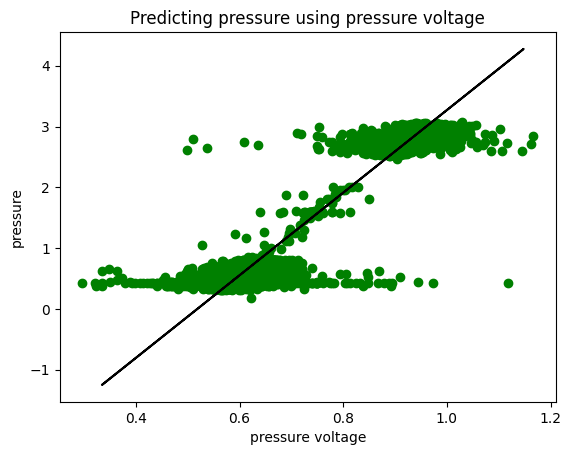

Input: pressure voltage
Predicted: pressure


In [62]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure using pressure voltage')
plt.xlabel('pressure voltage')
plt.ylabel('pressure')
plt.show()
print("Input: pressure voltage")
print("Predicted: pressure")




Score:  0.9730995900113099
Error:  0.17861302541249865


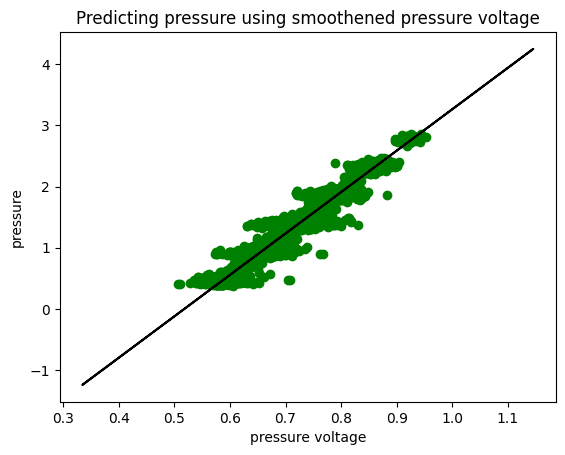

Input: pressure voltage
Predicted: pressure


In [63]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure using smoothened pressure voltage')
plt.xlabel('pressure voltage')
plt.ylabel('pressure')
plt.show()
print("Input: pressure voltage")
print("Predicted: pressure")

Score:  0.9087096314947444
Error:  1.0997873626565258


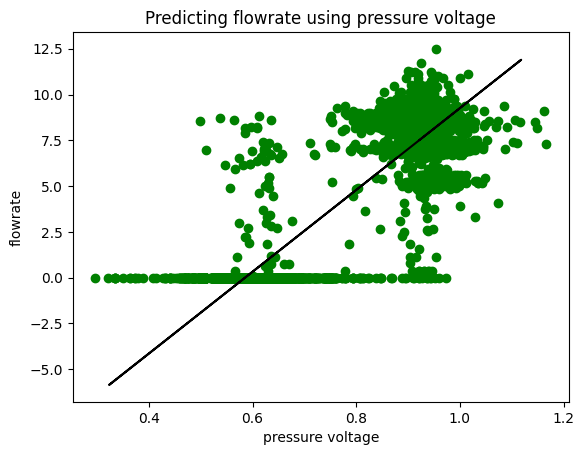

Input: pressure voltage
Predicted: flowrate


In [64]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate using pressure voltage')
plt.xlabel('pressure voltage')
plt.ylabel('flowrate')
# plt.plot(y_train)
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9167543288884309
Error:  1.054418373944083


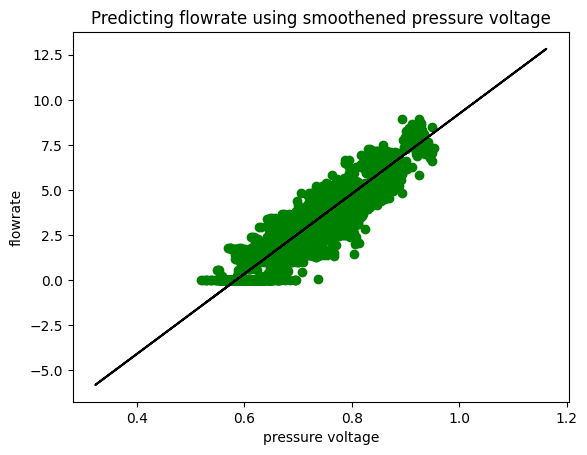

Input: pressure voltage
Predicted: flowrate


In [65]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate using smoothened pressure voltage')
plt.xlabel('pressure voltage')
plt.ylabel('flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9348246032399219
Error:  0.9249794493294856


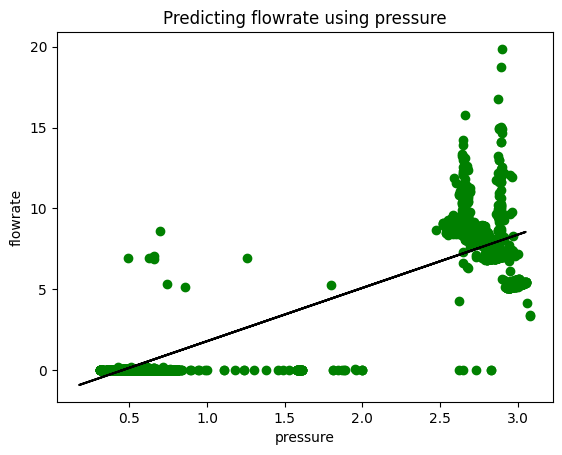

Input: pressure
Predicted: flowrate


In [66]:
df_binary = df[['flowrate', 'pressure']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate using pressure')
plt.xlabel('pressure')
plt.ylabel('flowrate')
plt.show()
print("Input: pressure")
print("Predicted: flowrate")

   flowrate sampled  pv sampled
0               0.0    0.598931
1               0.0    0.598931
2               0.0    0.598931
3               0.0    0.598931
4               0.0    0.598931
    flowrate sampled  pv sampled
0                0.0    0.598931
5                0.0    0.605054
10               0.0    0.612144
15               0.0    0.606020
20               0.0    0.598770
Score:  0.9310153991873604
Error:  0.9693369887885458


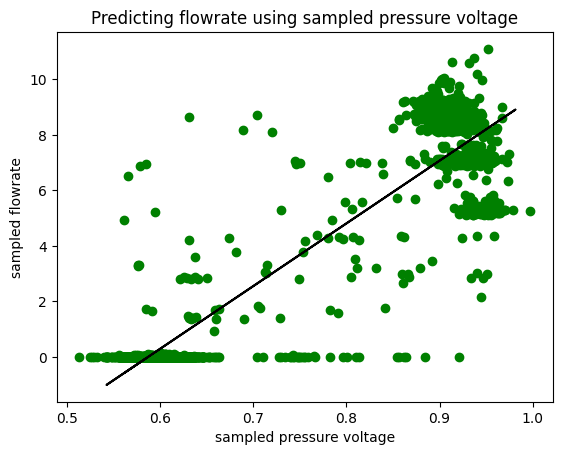

Input: sampled pressure voltage
Predicted: sampled flowrate


In [67]:
df_binary = df[['flowrate sampled', 'pv sampled']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pv sampled']).reshape(-1, 1)
y = np.array(df_binary['flowrate sampled']).reshape(-1, 1)

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate using sampled pressure voltage')
plt.xlabel('sampled pressure voltage')
plt.ylabel('sampled flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

   flowrate sampled  pv sampled
0               0.0    0.598931
1               0.0    0.598931
2               0.0    0.598931
3               0.0    0.598931
4               0.0    0.598931
    flowrate sampled  pv sampled
0                0.0    0.598931
5                0.0    0.605054
10               0.0    0.612144
15               0.0    0.606020
20               0.0    0.598770
Score:  0.9131668592821334
Error:  1.058084591366537


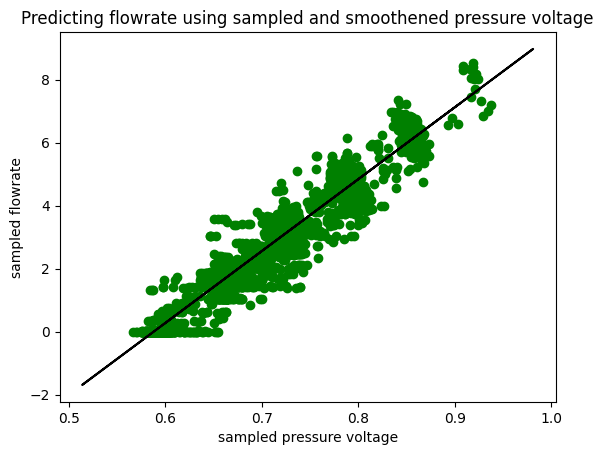

Input: sampled pressure voltage
Predicted: sampled flowrate


In [68]:
df_binary = df[['flowrate sampled', 'pv sampled']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pv sampled'])
y = np.array(df_binary['flowrate sampled'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate using sampled and smoothened pressure voltage')
plt.xlabel('sampled pressure voltage')
plt.ylabel('sampled flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9300920570035036
Error:  0.9655942645588272


C:\Users\gandh\AppData\Local\Temp\ipykernel_22388\3208558916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


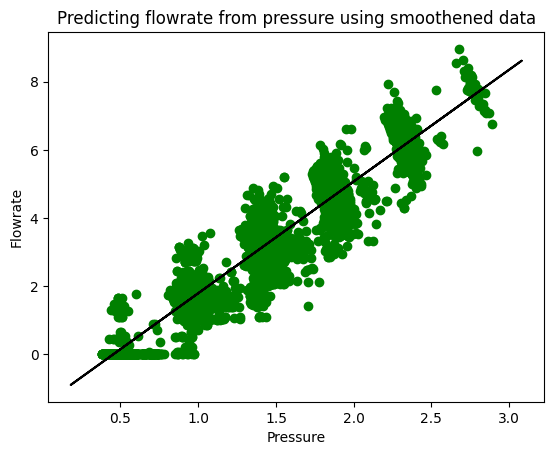

Input: smoothened pressure
Predicted: smoothened flowrate


In [69]:
df_binary = df[['flowrate_manual', 'pressure']]

X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: smoothened pressure")
print("Predicted: smoothened flowrate")

# PH03-02

In [90]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0302(2).xlsx')

Score:  0.7803592028370213
Error:  0.9277513951906288


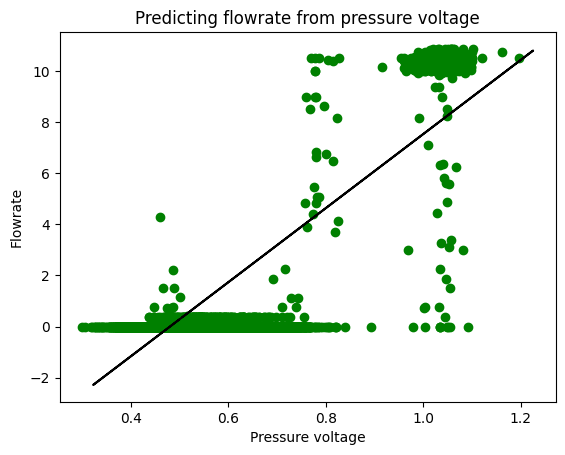

Input: pressure voltage
Predicted: flowrate


In [91]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.7510972018050109
Error:  0.9566998768063131


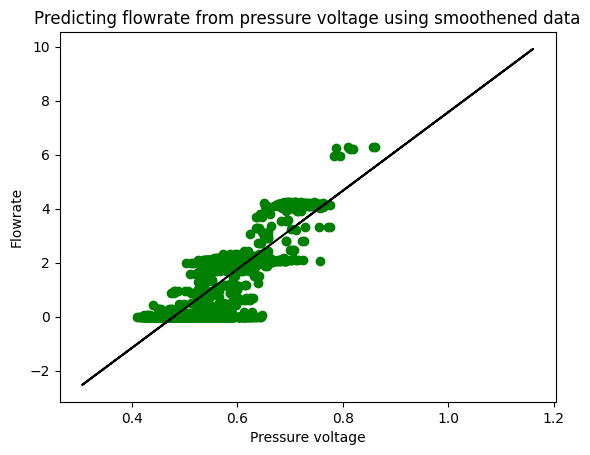

Input: pressure voltage
Predicted: flowrate


In [92]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.8222182928677404
Error:  0.8506268880890661


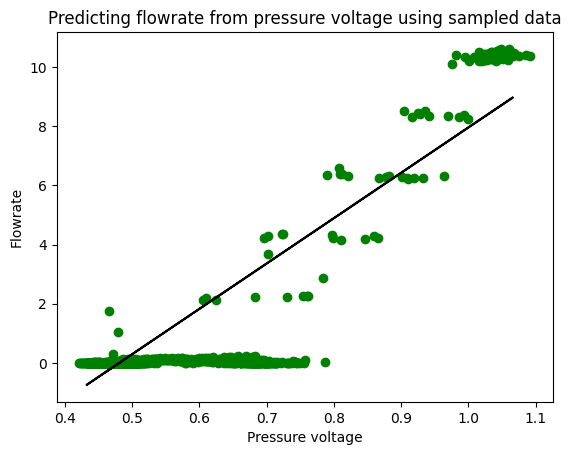

Input: sampled pressure voltage
Predicted: sampled flowrate


In [93]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.8127011327603286
Error:  0.8528757904966249


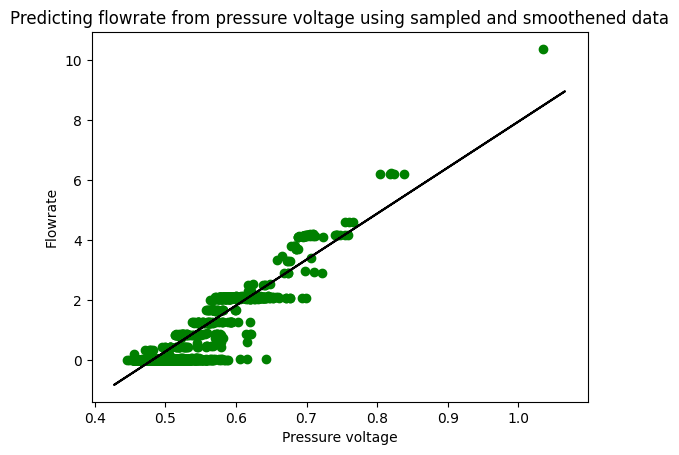

Input: sampled pressure voltage
Predicted: sampled flowrate


In [94]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# PH03-03

In [95]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0303(2).xlsx')

Score:  0.9231447206281571
Error:  0.6427497327003966


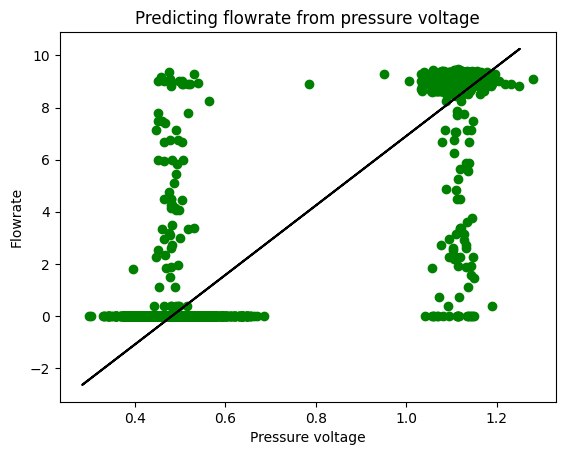

Input: pressure voltage
Predicted: flowrate


In [96]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9199671823703416
Error:  0.615347324364809


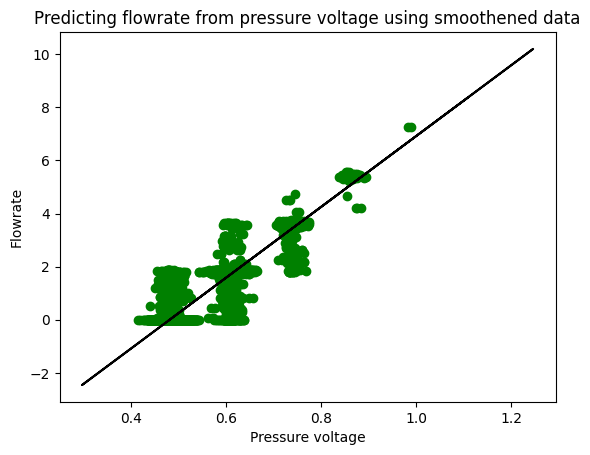

Input: pressure voltage
Predicted: flowrate


In [97]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9833326124102614
Error:  0.26609673628181174


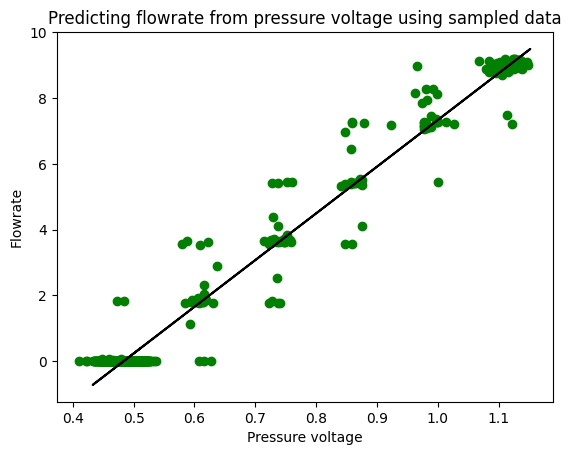

Input: sampled pressure voltage
Predicted: sampled flowrate


In [98]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9863642829325548
Error:  0.26367653752887815


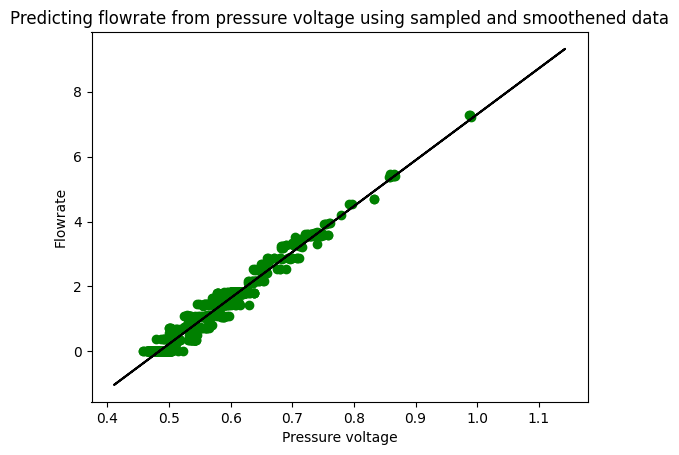

Input: sampled pressure voltage
Predicted: sampled flowrate


In [99]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")